# Lab | Intro to Probability

**Objective**

Welcome to this Intro to Probability lab, where we explore decision-making scenarios through the lens of probability and strategic analysis. In the business world, making informed decisions is crucial, especially when faced with uncertainties. This lab focuses on scenarios where probabilistic outcomes play a significant role in shaping strategies and outcomes. Students will engage in exercises that require assessing and choosing optimal paths based on data-driven insights. The goal is to enhance your skills by applying probability concepts to solve real-world problems.

**Challenge 1**

#### Ironhack Airlines 

Often Airlines sell more tickets than they have seats available, this is called overbooking. Consider the following:
- A plane has 450 seats. 
- Based on historical data we conclude that each individual passenger has a 3% chance of missing it's flight. 

If the Ironhack Airlines routinely sells 460 tickets, what is the chance that they have a seats for all passenger?

In [125]:
#code here
import math as m
import scipy.stats as st
n = 460
k = 450
p = 0.97

# fist version
cdf_450 = 0
for i in range(1, k + 1):
    c = m.factorial(n) / (m.factorial(i) * m.factorial(n - i))
    proba_450 = c * (p ** i) * ((1 - p) ** (n - i))
    cdf_450 += proba_450
# second version
probability = st.binom.cdf(k, n, p)


print(cdf_450)
print(probability)

0.884477246621543
0.8844772466215431


**Challenge 2**

#### Ironhack Call Center 

Suppose a customer service representative at a call center is handling customer complaints. Consider the following:
- The probability of successfully resolving a customer complaint on the first attempt is 0.3. 


What is the probability that the representative needs to make at least three attempts before successfully resolving a customer complaint?

In [126]:
#code here
p_success = 0.3 # <- p: Probability of success on a single attempt
q = 1 - p_success  
k_target = 3    # <- k: The minimum number of attempts (here, k = 3)

# fisrt version
p_at_least_3 = q ** (k_target - 1)
print(p_at_least_3)

# second version
p_at_least_3 = 1 - st.geom.cdf(k_target - 1, p_success)
print(p_at_least_3)

0.48999999999999994
0.49


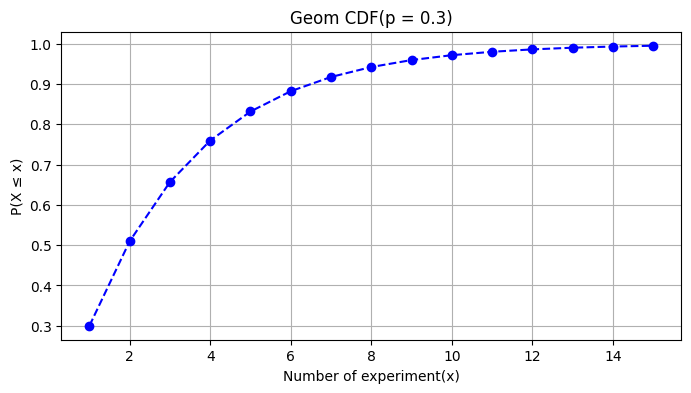

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

p = 0.3

x_values = np.arange(1, 16)  

cdf_values = st.geom.cdf(x_values, p)
plt.figure(figsize=(8, 4))
plt.plot(x_values, cdf_values, marker='o', linestyle='--', color='b')


plt.xlabel('Number of experiment(x)')
plt.ylabel('P(X ≤ x)')
plt.title('Geom CDF(p = 0.3)')
plt.grid(True)


plt.show()


**Challenge 3**

#### Ironhack Website

Consider a scenario related to Ironhack website traffic. Where:
- our website takes on average 500 visits per hour.
- the website's server is designed to handle up to 550 vists per hour.


What is the probability of the website server being overwhelmed?

In [128]:
#code here
import math
lamb = 500
n = 550

p_n = 1 - st.poisson.cdf(n, lamb)
print(f"P(N = {n}):", p_n)

P(N = 550): 0.01289822084039205


What is the probability of being overwhelmed at some point during a day? (consider 24hours)

In [129]:
#first version
P_correct_work = 1 - p_n
P_correct_work_24 = P_correct_work ** 24
q_overwhelmed = 1 - P_correct_work_24
print(f"P(overwhelmed):", q_overwhelmed)

#second version
p_overwhelmed2 = st.geom.cdf(24, p_n)
print(f"P(overwhelmed):", p_overwhelmed2)

P(overwhelmed): 0.2677043869515715
P(overwhelmed): 0.2677043869515715


**Challenge 4**

#### Ironhack Helpdesk

Consider a scenario related to the time between arrivals of customers at a service desk.

On average, a customers arrives every 10minutes.

What is the probability that the next customer will arrive within the next 5 minutes?

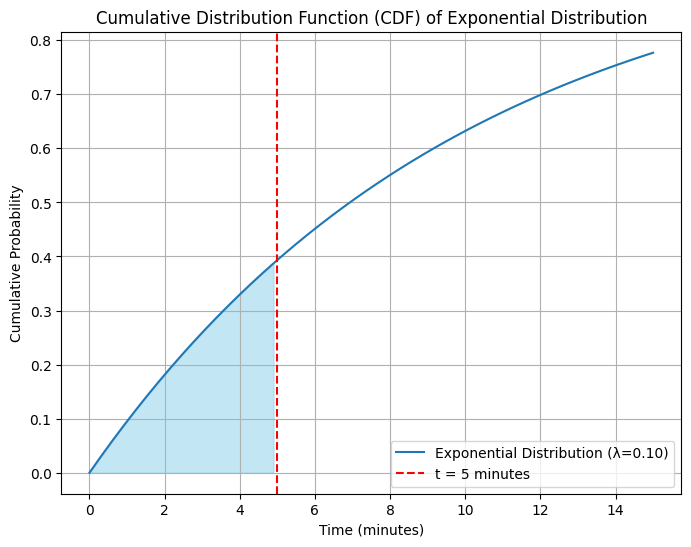

Probability that time between  customers is less than 5 minutes: 39.3%


In [130]:
mean_time = 10  # minutes

# Rate parameter (lambda)
lambda_param = 1 / mean_time # one bus every 10 minutes

# Time range for plotting
time_values = np.linspace(0, 15)

# CDF of the exponential distribution
cdf_values = st.expon.cdf(time_values, scale=1/lambda_param)

# Plotting the CDF
plt.figure(figsize=(8, 6))
plt.plot(time_values, cdf_values, label=f'Exponential Distribution (λ={lambda_param:.2f})')
plt.axvline(5, color='r', linestyle='--', label='t = 5 minutes')
plt.fill_between(time_values, 0, cdf_values, where=(time_values <= 5), color='skyblue', alpha=0.5)

# Labeling the plot
plt.title('Cumulative Distribution Function (CDF) of Exponential Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Cumulative Probability')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

prob_less_than_5 = st.expon.cdf(5, scale=1/lambda_param)
print(f'Probability that time between  customers is less than 5 minutes: {prob_less_than_5:.1%}')

If there is no customer for 15minutes, employees can that a 5minutes break.

What is the probability an employee taking a break?

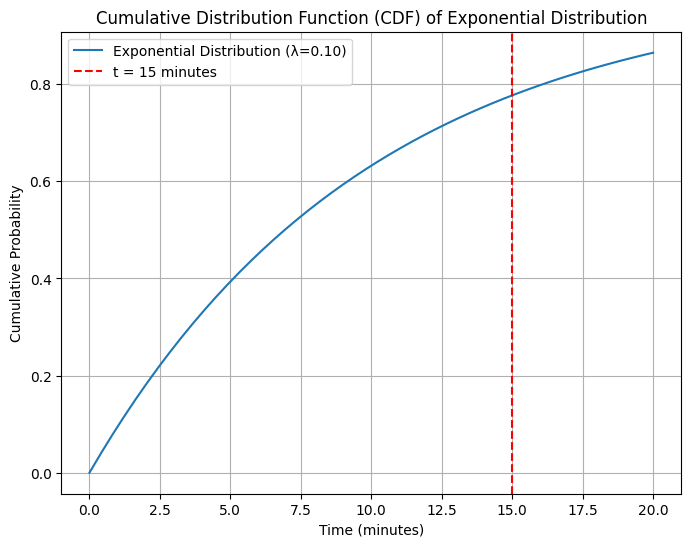

Probability that time between  customers is more than 15 minutes: 22.3%


In [131]:
# Time range for plotting
time_values = np.linspace(0, 20)

# CDF of the exponential distribution
cdf_values = st.expon.cdf(time_values, scale=1/lambda_param)

# Plotting the CDF
plt.figure(figsize=(8, 6))
plt.plot(time_values, cdf_values, label=f'Exponential Distribution (λ={lambda_param:.2f})')
plt.axvline(15, color='r', linestyle='--', label='t = 15 minutes')


# Labeling the plot
plt.title('Cumulative Distribution Function (CDF) of Exponential Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Cumulative Probability')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the probability that time between arrivals is less than 8 minutes
prob_more_than_15 = 1 - st.expon.cdf(15, scale=1/lambda_param)
print(f'Probability that time between  customers is more than 15 minutes: {prob_more_than_15:.1%}')

**Challenge 5**

The weights of a certain species of birds follow a normal distribution with a mean weight of 150 grams and a standard deviation of 10 grams. 

- If we randomly select a bird, what is the probability that its weight is between 140 and 160 grams?

In [132]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

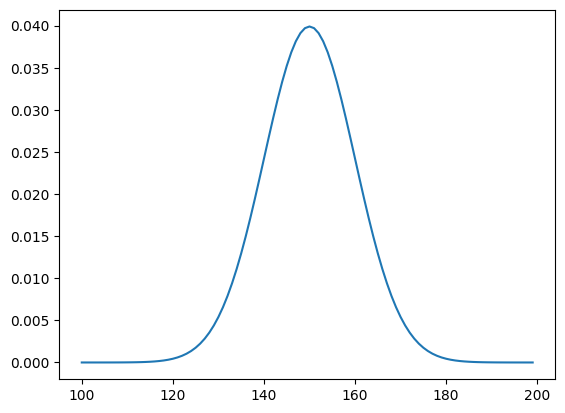

In [133]:
mean = 150 
st_deviation = 10
x_values = np.arange(100, 200)
probabilities = stats.norm.pdf(x_values, mean, st_deviation)
plt.plot(x_values, probabilities)

In [134]:
proba_less_140 = stats.norm.cdf(140, mean, st_deviation)

proba_less_160 = stats.norm.cdf(160, mean, st_deviation)
print(f"Probability of a value between 140 and 160: {proba_less_160 - proba_less_140}")

Probability of a value between 140 and 160: 0.6826894921370859


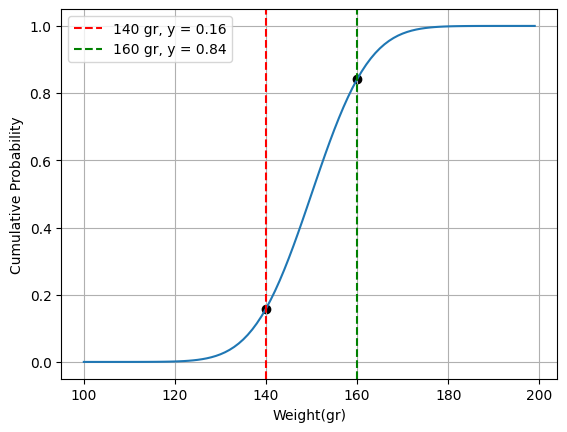

In [135]:
cum_probabilities = stats.norm.cdf(x_values, mean, st_deviation)
plt.plot(x_values, cum_probabilities)

plt.axvline(x=140, color='red', linestyle='--', label=f'140 gr, y = {proba_less_140:.2f}')
plt.axvline(x=160, color='green', linestyle='--', label=f'160 gr, y = {proba_less_160:.2f}')

plt.scatter([140, 160], [proba_less_140, proba_less_160], color='black')
plt.xlabel('Weight(gr)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

**Challenge 6**

If the lifetime (in hours) of a certain electronic component follows an exponential distribution with a mean lifetime of 50 hours, what is the probability that the component fails within the first 30 hours?

0.4511883639059736


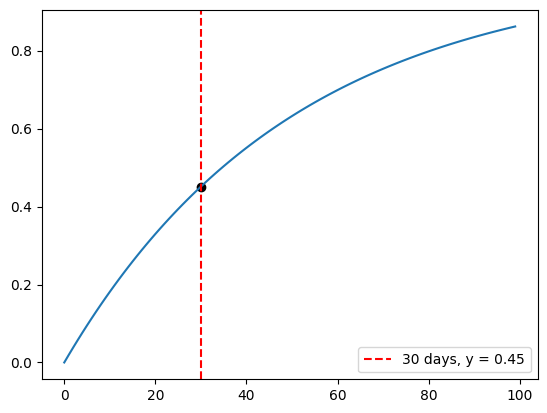

In [136]:
#code here
mean = 50

x_values = np.arange(0, 100)
probabilities = stats.expon.cdf(x_values, scale=mean)
plt.plot(x_values, probabilities)
proba_less_30 = stats.expon.cdf(30, scale=mean)

plt.axvline(x=30, color='red', linestyle='--', label=f'30 days, y = {proba_less_30:.2f}')
plt.scatter(30, proba_less_30, color='black')
plt.legend()

print(proba_less_30)
